Linear model: arr_delay ~ hour + origin + carrier + season + dow

# 샌프란시스코행 항공편의 도착은 왜 지연되었는가?

먼저 항공평 도착지연에 영향을 줄 수 있는 변수가 어떤 것이 있을지 생각해보는 준비단계

비행시간, 계절 , 출발한 시간대 , 요일 등이 영향을 줄 수 있지 않을까?

In [ ]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [ ]:
def rangeplot(df, x, y, color=None, alpha=0.1):

    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Range(), so.Est("median", errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

In [ ]:
# import the data
flights = sm.datasets.get_rdataset('flights', 'nycflights13').data

# convert the date column to a datetime object
flights["time_hour"] = pd.to_datetime(flights["time_hour"])

# add a column for the day of the week
flights["dow"] = (
    flights["time_hour"]
    .dt.day_name()
    .str[:3]
    .astype("category")
    .cat.set_categories(["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
)

# add a column for the season
flights["season"] = np.where(flights["month"].isin([6, 7]), "summer", "other month")
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dow,season
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,Tue,other month
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,Tue,other month
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,Tue,other month
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,Tue,other month
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Tue,other month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Mon,other month
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Mon,other month
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Mon,other month
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Mon,other month


In [ ]:
# with assign
flights.assign(
    season = lambda x: np.where(x.month.isin([6, 7]), "summer", "other month")
)

# pd.eval
flights.assign(
    season = lambda x: np.where(pd.eval('x.month in [6, 7]'), "summer", "other month")
)

# apply with if-else
flights["month"].apply(lambda x: "summer" if x in [6, 7] else "other month")

# appply with match
def get_season(mth):
    match mth:
        case 6 | 7:
            return "summer"
        case _:
            return "other month"

flights["month"].apply(get_season)

# map with dictionary
flights["month"].map({6: "summer", 7: "summer"}).fillna("other month")

0         other month
1         other month
2         other month
3         other month
4         other month
             ...     
336771    other month
336772    other month
336773    other month
336774    other month
336775    other month
Name: month, Length: 336776, dtype: object

In [ ]:
# filter out the flights to SFO
sfo = flights.query('dest == "SFO" & arr_delay < 500').copy()
sfo

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dow,season
13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,...,N53441,EWR,SFO,361.0,2565,6,0,2013-01-01 06:00:00,Tue,other month
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,...,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00,Tue,other month
55,2013,1,1,655.0,700,-5.0,1037.0,1045,-8.0,DL,...,N705TW,JFK,SFO,362.0,2586,7,0,2013-01-01 07:00:00,Tue,other month
82,2013,1,1,729.0,730,-1.0,1049.0,1115,-26.0,VX,...,N635VA,JFK,SFO,356.0,2586,7,30,2013-01-01 07:00:00,Tue,other month
87,2013,1,1,734.0,737,-3.0,1047.0,1113,-26.0,B6,...,N625JB,JFK,SFO,350.0,2586,7,37,2013-01-01 07:00:00,Tue,other month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336658,2013,9,30,1938.0,1850,48.0,2248.0,2220,28.0,VX,...,N626VA,JFK,SFO,323.0,2586,18,50,2013-09-30 18:00:00,Mon,other month
336662,2013,9,30,1940.0,1900,40.0,2228.0,2232,-4.0,DL,...,N723TW,JFK,SFO,323.0,2586,19,0,2013-09-30 19:00:00,Mon,other month
336679,2013,9,30,2001.0,2000,1.0,2302.0,2328,-26.0,UA,...,N35260,EWR,SFO,323.0,2565,20,0,2013-09-30 20:00:00,Mon,other month
336701,2013,9,30,2023.0,2025,-2.0,2315.0,2350,-35.0,B6,...,N712JB,JFK,SFO,327.0,2586,20,25,2013-09-30 20:00:00,Mon,other month


In [ ]:
from statsmodels.formula.api import ols
mod = ols("arr_delay ~ air_time", data=sfo).fit()

In [ ]:
mod.params

Intercept   -252.476372
air_time       0.737465
dtype: float64

In [ ]:
# data range from the carat variable
grid = pd.DataFrame({"carat": []})
grid["carat"]= np.linspace(sfo.carat.min(), sfo.carat.max(), 20)
grid = grid.assign(
    lcarat=lambda x: np.log2(x.carat),
    lprice=lambda x: mod_diamonds.predict(x.lcarat),
    price=lambda x: 2**x.lprice
)

# 카테고리 변수와 arr_delay 관계 파악하기

season에 따른 arr_delay

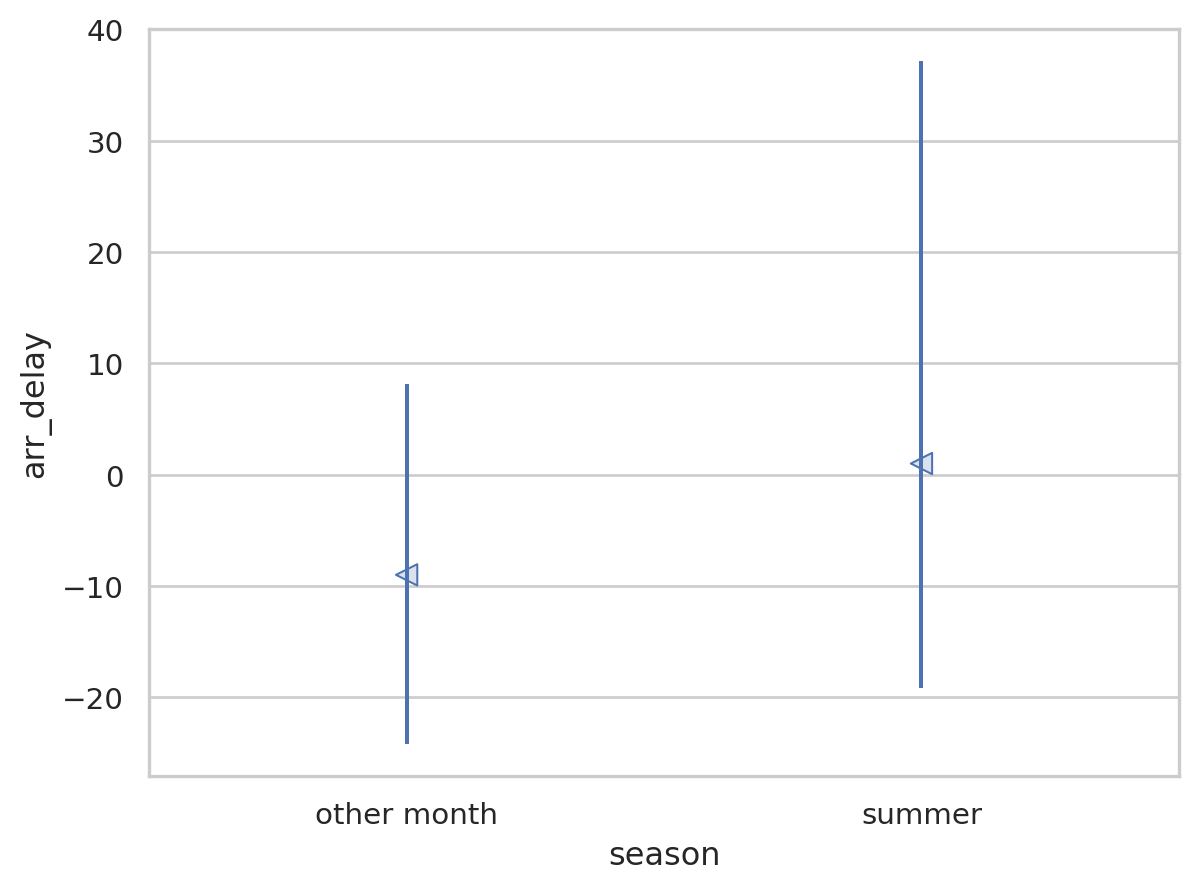

In [ ]:
sfo_sea = rangeplot(sfo, x="season", y="arr_delay")
sfo_sea

dow에 따른 arr_delay

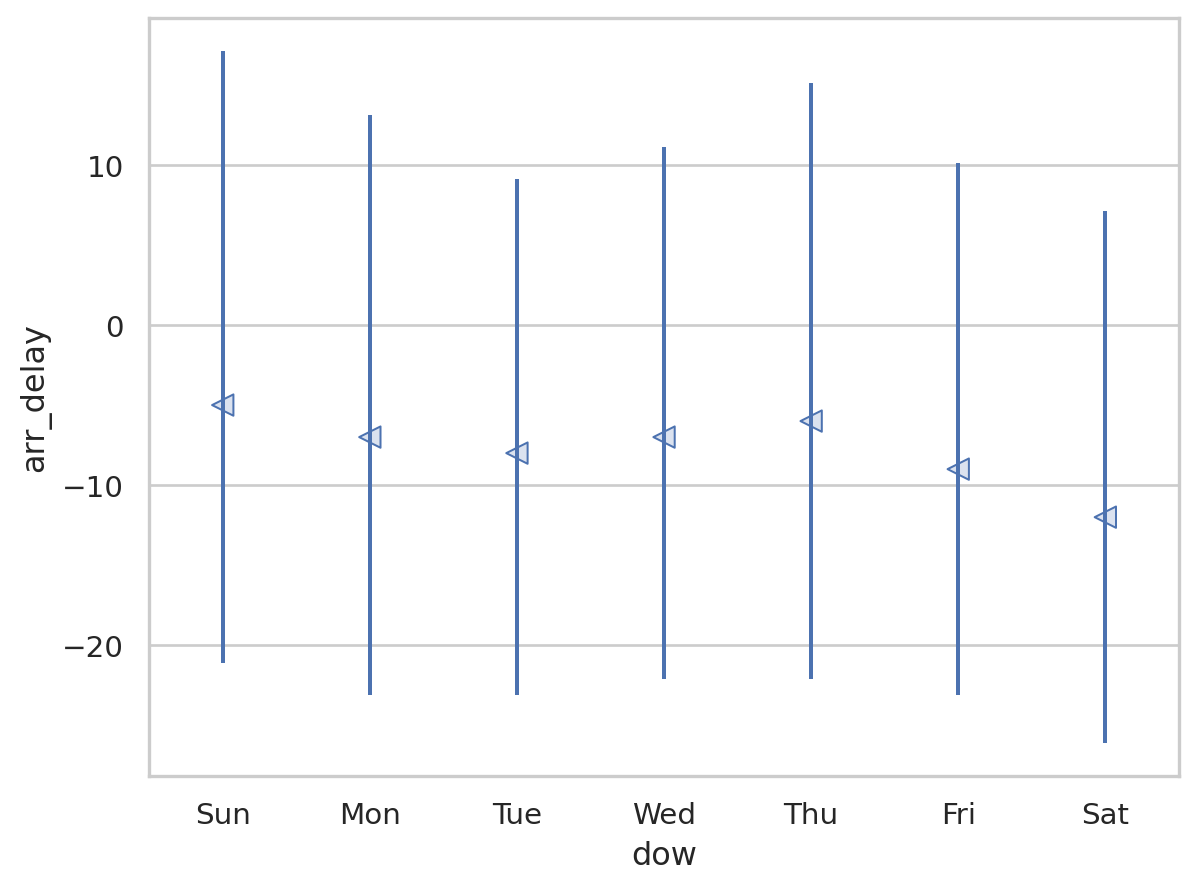

In [ ]:
sfo_day = rangeplot(sfo, x="dow", y="arr_delay")
sfo_day

origin에 따른 arr_delay

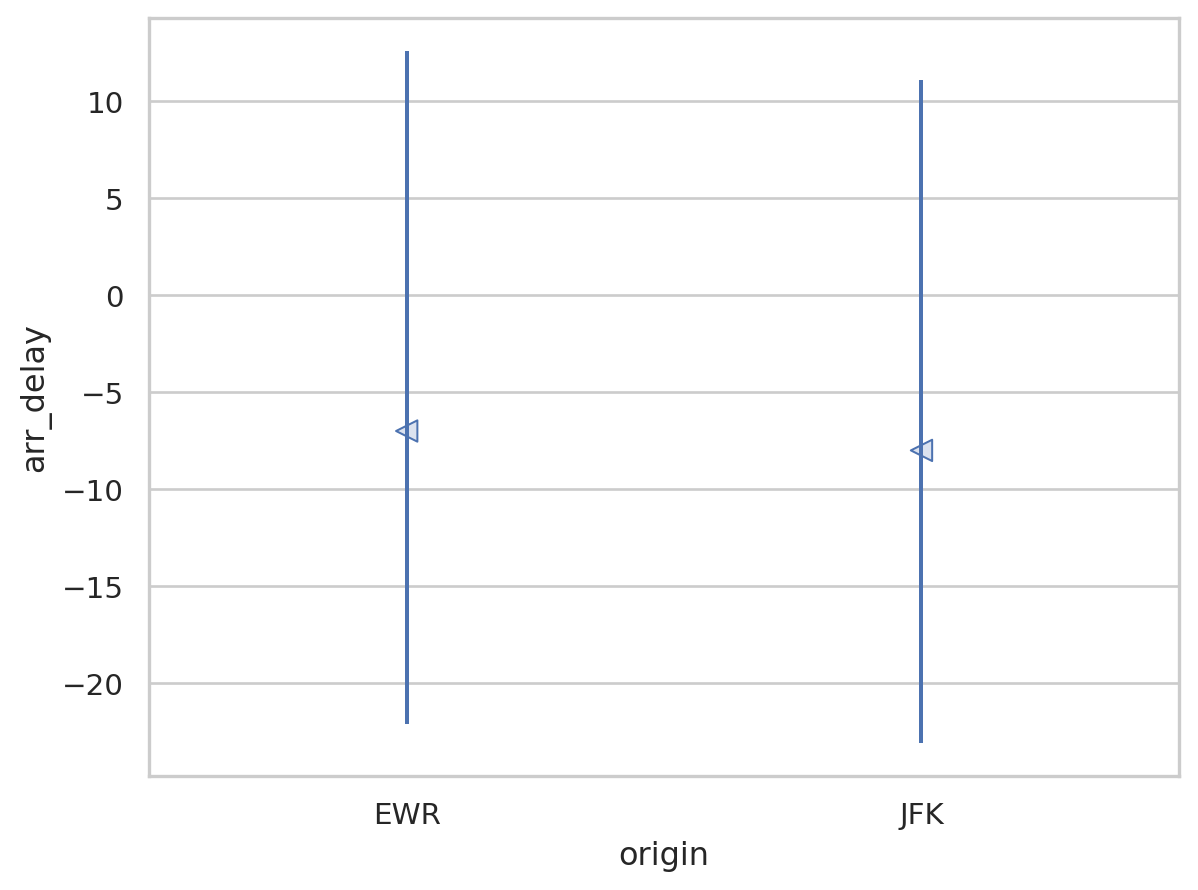

In [ ]:
sfo_ori = rangeplot(sfo, x="origin", y="arr_delay")
sfo_ori

aire_time과 arr_delay의 관계 


air_time은 (300,400) 사이의 값을 확인함

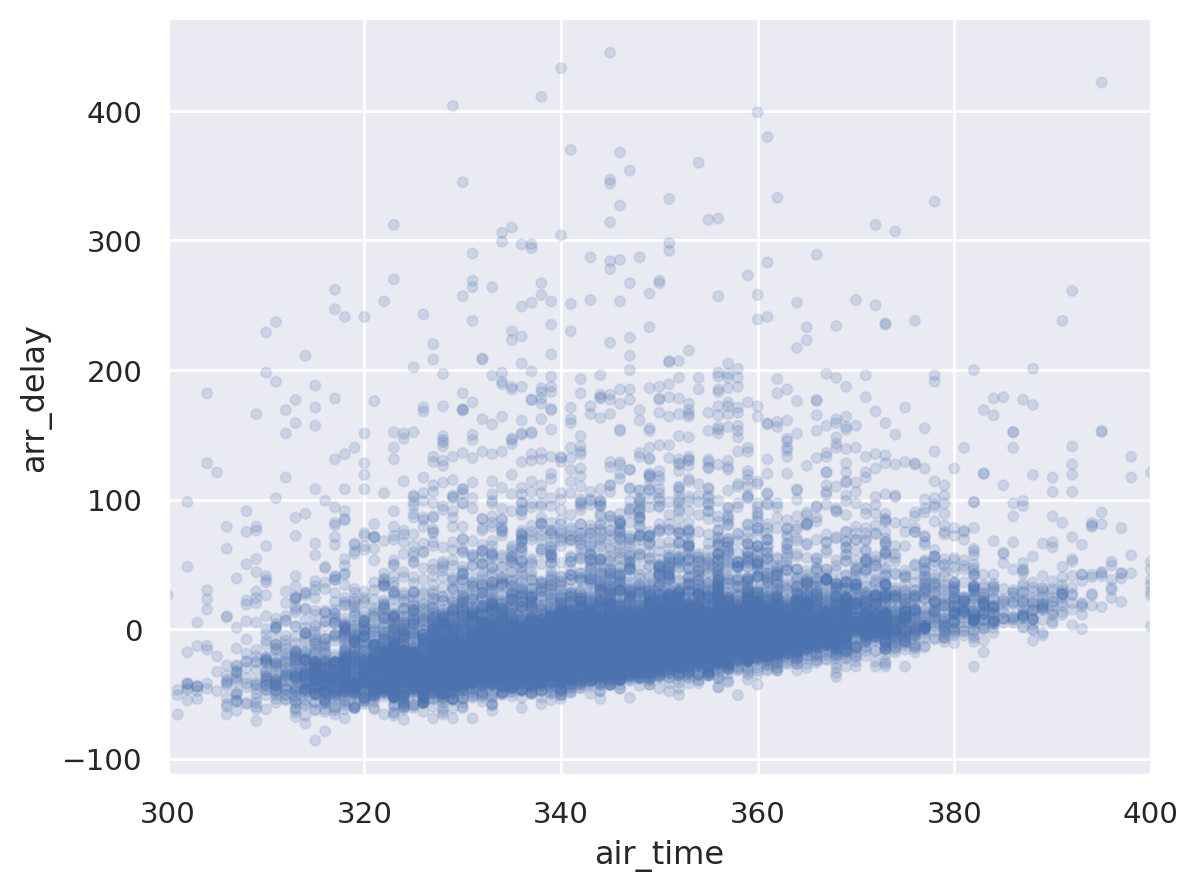

In [ ]:
late = (
    so.Plot(sfo, x='air_time', y='arr_delay')
    .add(so.Dots(alpha=.1))
    .limit(x=(300, 400))
)
late

season과 air_time의 관계를 파악

season은 (6,7) 월과 나머지로 분류함

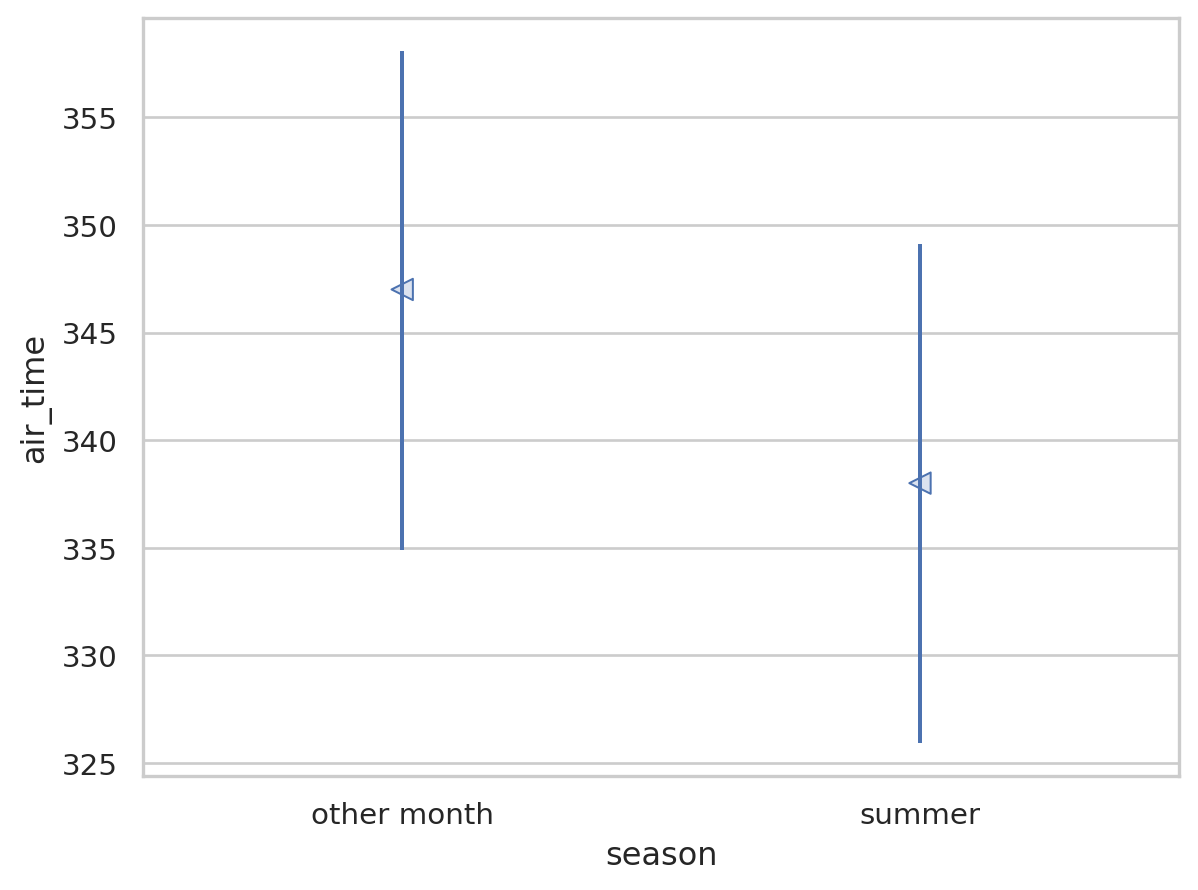

In [ ]:
sfo_sea = rangeplot(sfo, x="season", y="air_time")
sfo_sea

dow와 air_time의 관계

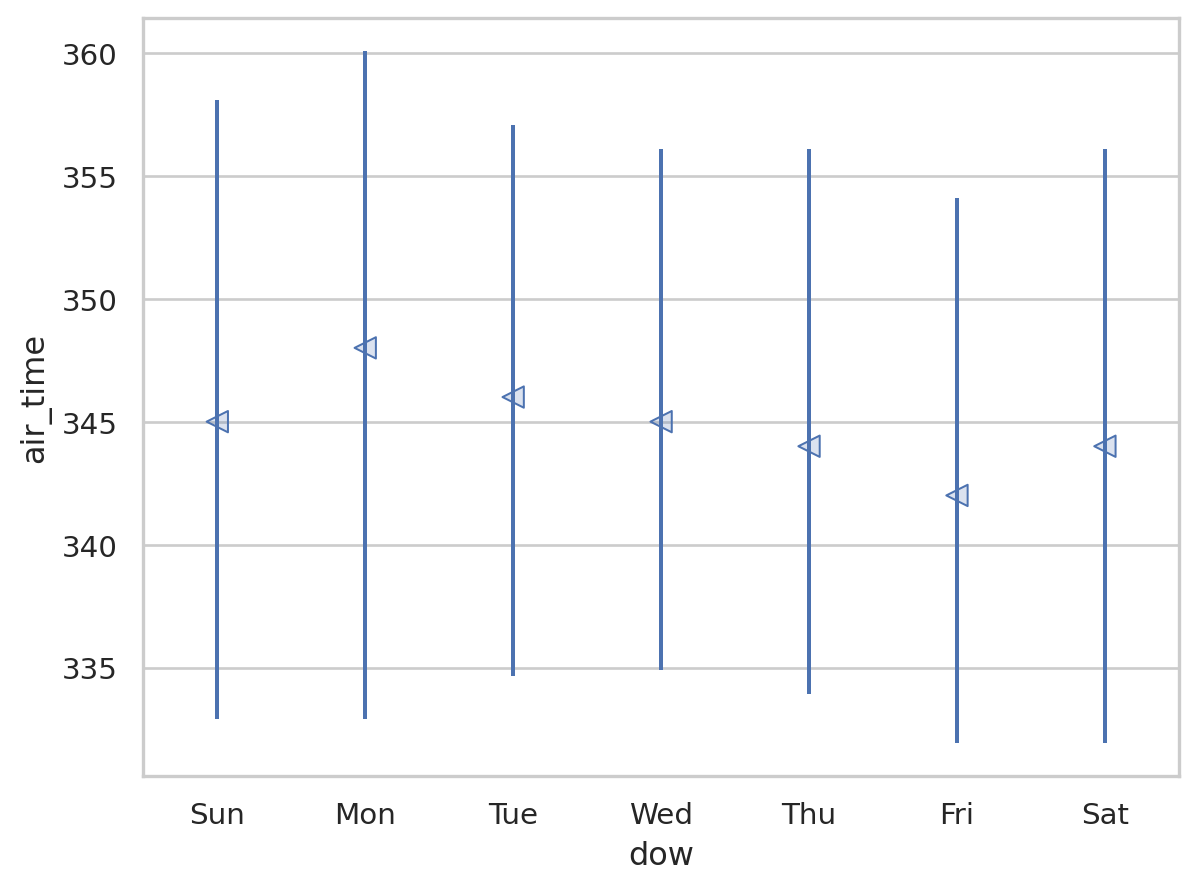

In [ ]:
sfo_day = rangeplot(sfo, x="dow", y="air_time")
sfo_day

origin과 air_time의 관계 

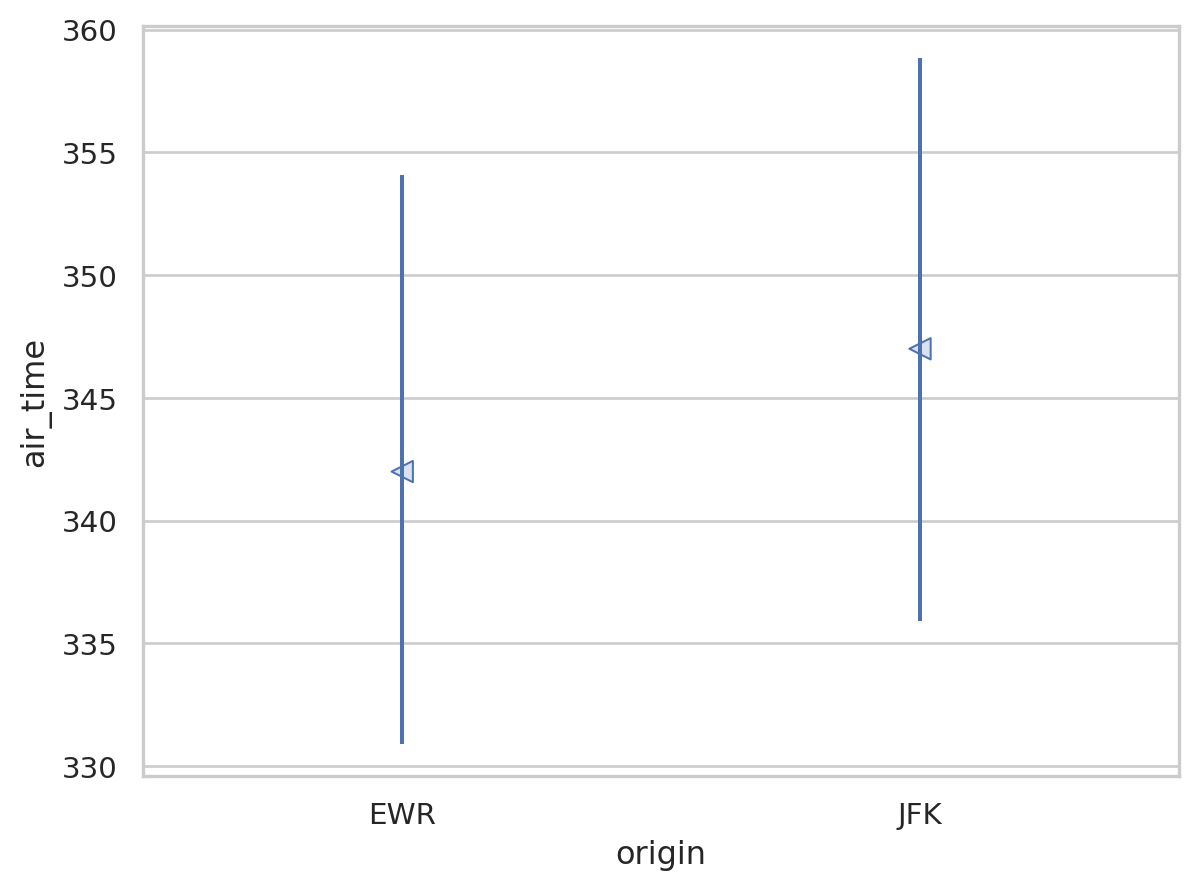

In [ ]:
sfo_ori = rangeplot(sfo, x="origin", y="air_time")
sfo_ori

출발 시간과 arr delay가 관계가 있나?

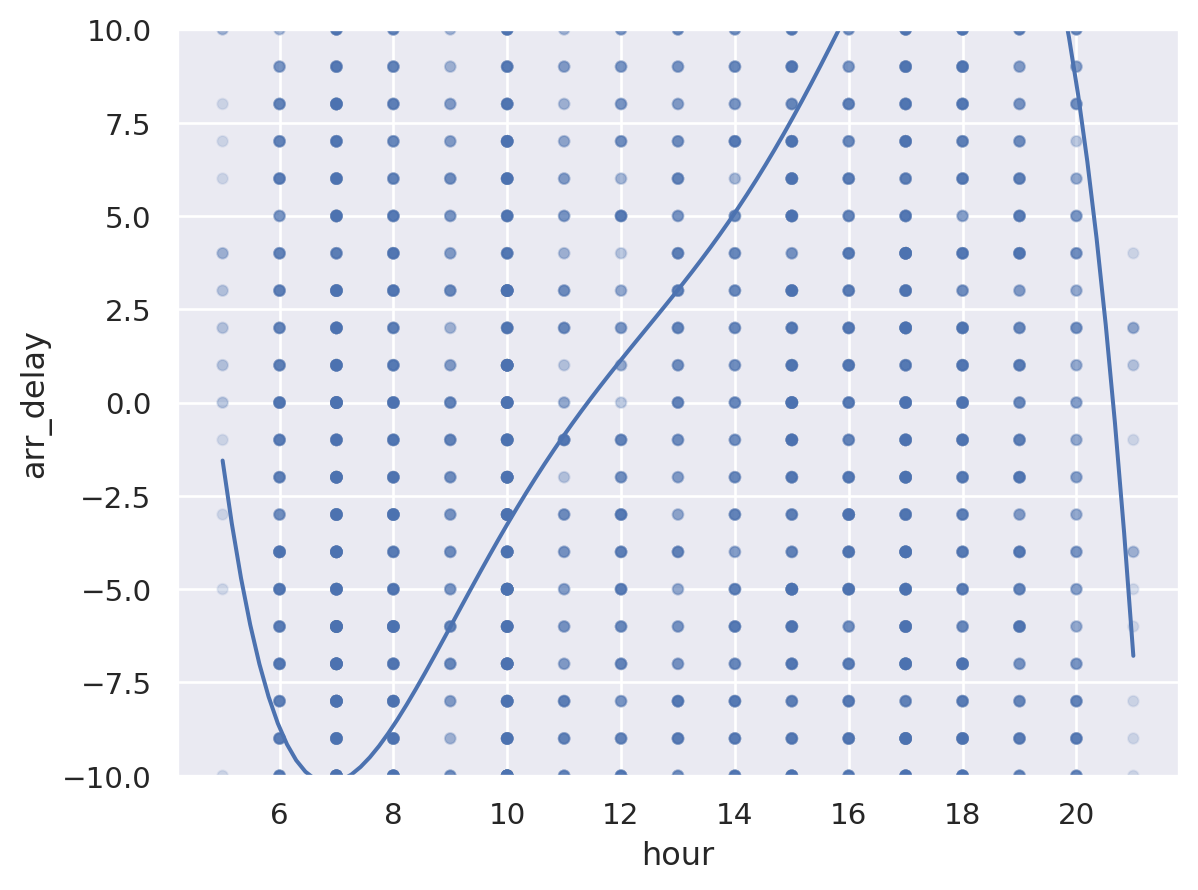

In [ ]:
late1 = (
    so.Plot(sfo, x='hour', y='arr_delay')
    .add(so.Dots(alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .limit(y=(-10,10))
)
late1

sched_dep_time 과 arr delay의 관계 파악
그리고 


각각 arr delay, sched_dep_time과 origin,dow, season과의 관계 파악

우선 airtime을 400이하로 제한하고 sched_dep_time과 arr_delay간의 선형모형을 세워봄

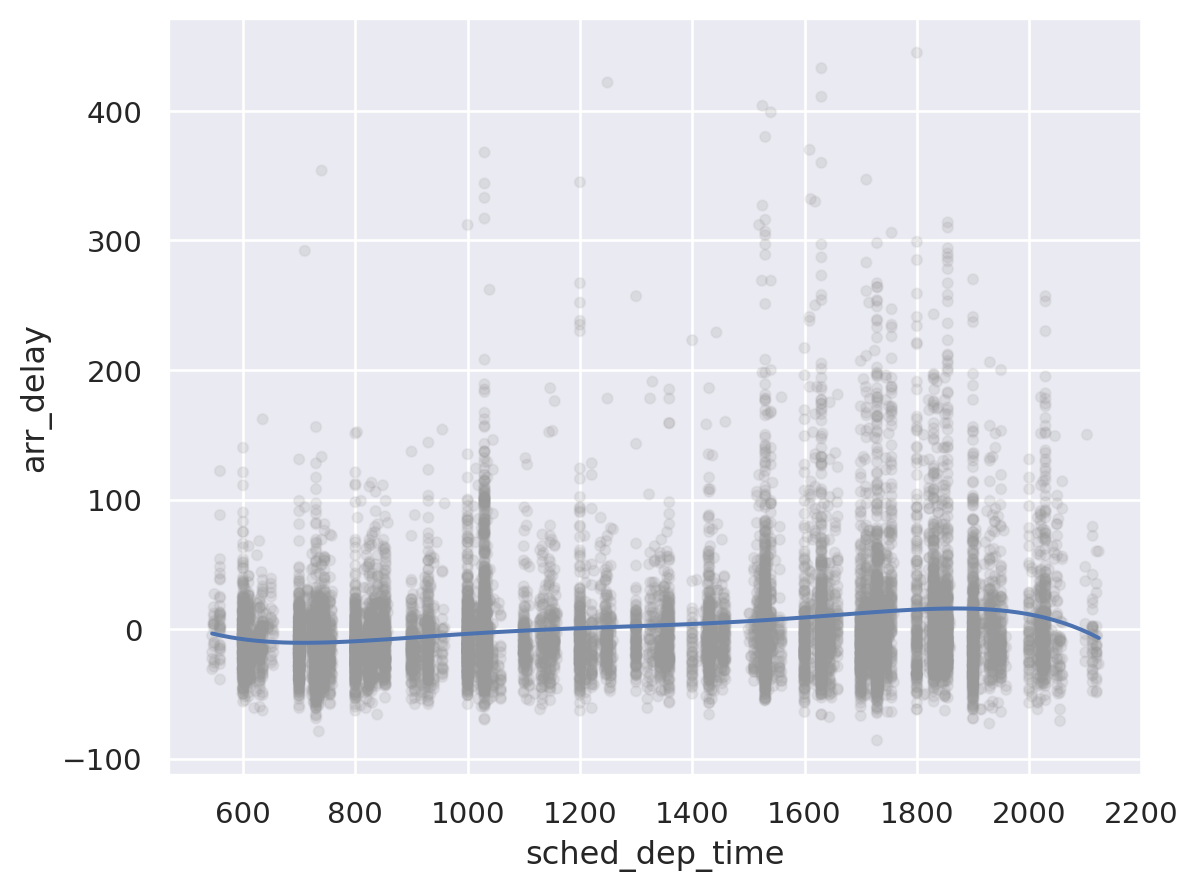

In [ ]:
(
    so.Plot(sfo1, x='sched_dep_time', y='arr_delay')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))

)

In [ ]:
from statsmodels.formula.api import ols
mod= ols("arr_delay ~ sched_dep_time", data=sfo1).fit()

In [ ]:
mod.params

Intercept        -23.631392
sched_dep_time     0.020015
dtype: float64

In [ ]:
mod1 = ols("arr_delay ~ sched_dep_time + season", data=sfo).fit()
mod2 = ols("arr_delay ~ sched_dep_time + dow", data=sfo).fit()
mod3 = ols("arr_delay ~ sched_dep_time + origin", data=sfo).fit()

# mod.params
mod1.params

Intercept          -27.369781
season[T.summer]    24.374977
sched_dep_time       0.019613
dtype: float64

In [ ]:
mod2.params

Intercept        -18.798340
dow[T.Mon]        -3.129332
dow[T.Tue]        -6.287375
dow[T.Wed]        -4.911035
dow[T.Thu]        -1.869581
dow[T.Fri]        -5.624241
dow[T.Sat]       -11.003271
sched_dep_time     0.019865
dtype: float64

In [ ]:
mod3.params

Intercept        -23.828909
origin[T.JFK]      0.412972
sched_dep_time     0.020081
dtype: float64

season, dow , origin 이 서로 연관되어있는지 확인하기

In [ ]:
table1 = sfo.groupby(["season", "dow"]).size().reset_index(name="n")
table2 = sfo.groupby(["season", "origin"]).size().reset_index(name="n")
table3 = sfo.groupby(["dow", "origin"]).size().reset_index(name="n")

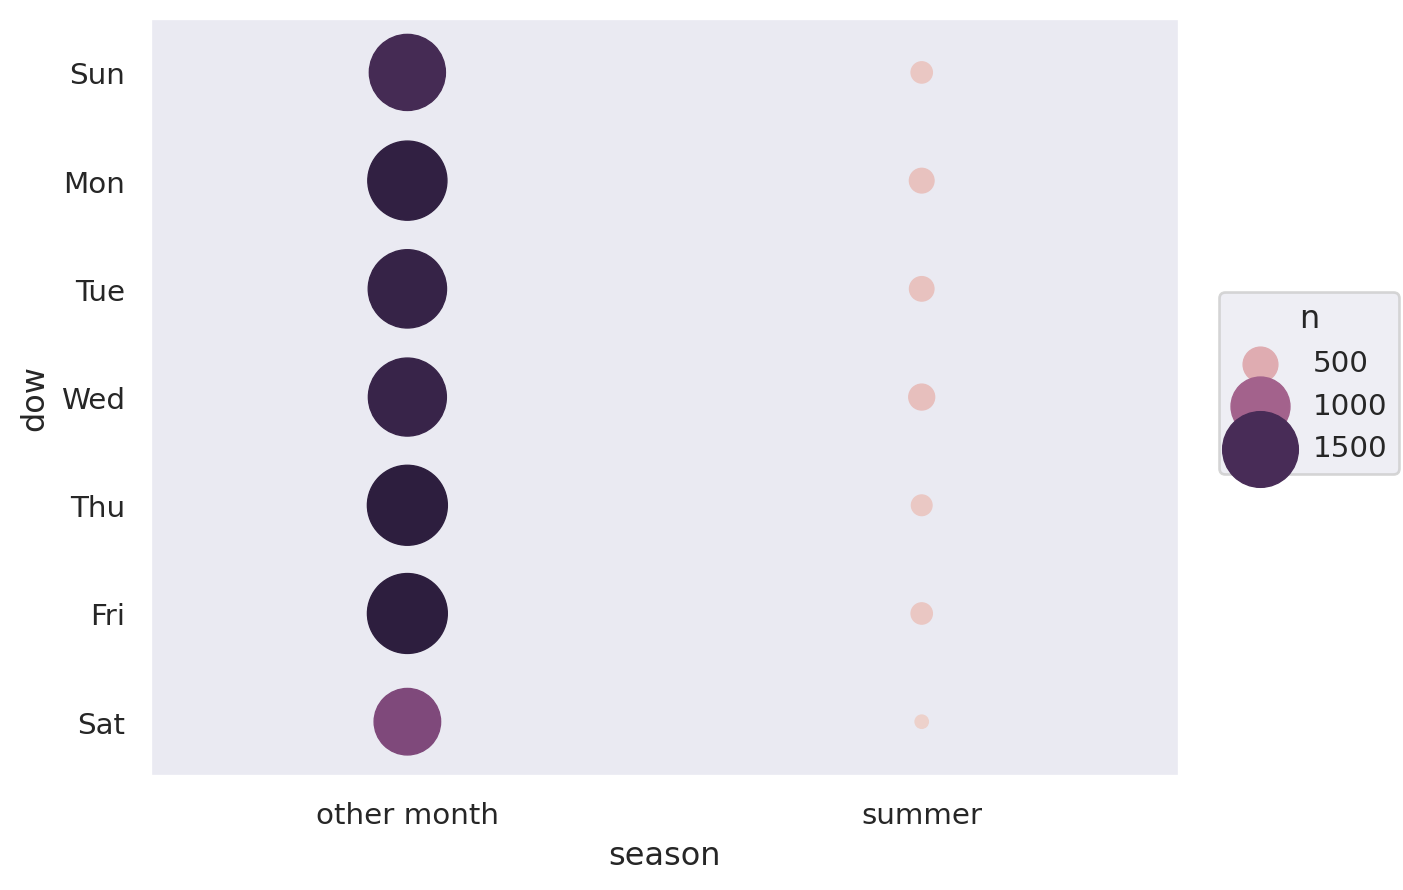

In [ ]:
p1 = so.Plot(table1, x="season", y="dow", pointsize="n", color="n").add(so.Dot()).scale(pointsize=(5, 30))
p1

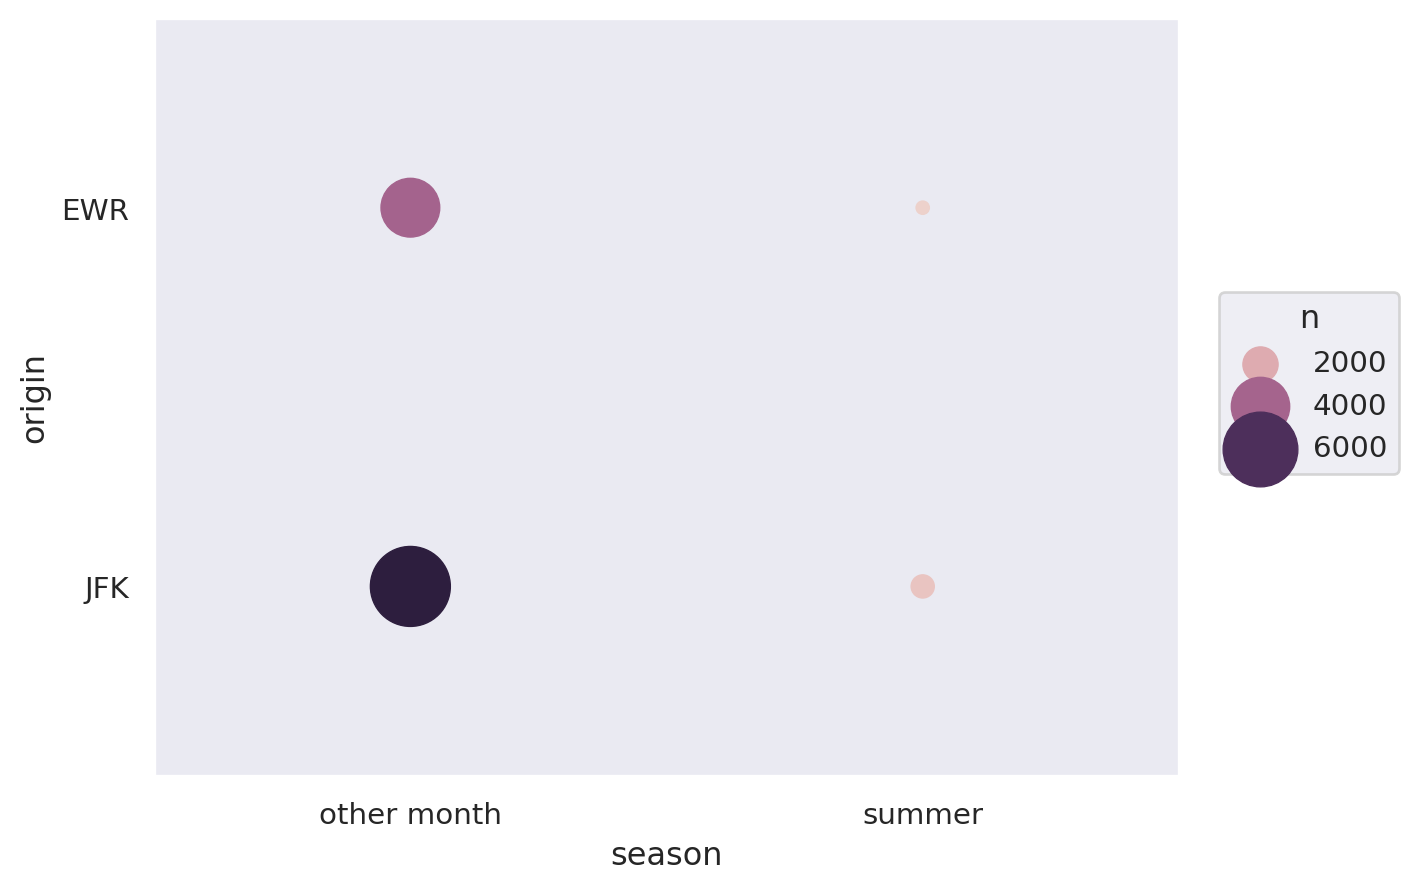

In [ ]:
p2 = so.Plot(table2, x="season", y="origin", pointsize="n", color="n").add(so.Dot()).scale(pointsize=(5, 30))
p2

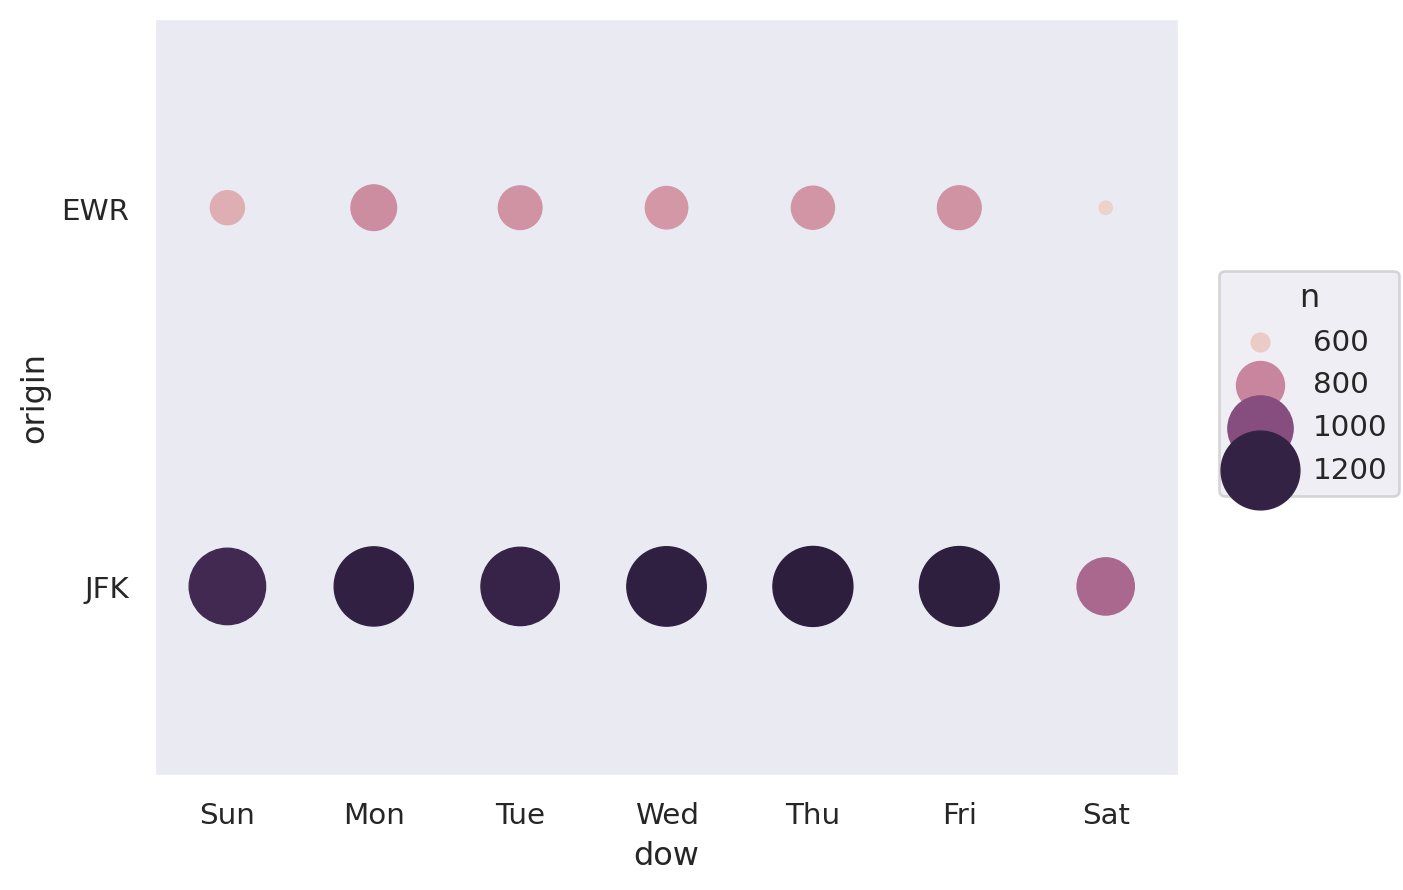

In [ ]:
p3 = so.Plot(table3, x="dow", y="origin", pointsize="n", color="n").add(so.Dot()).scale(pointsize=(5, 30))
p3

요일에 따른 arr_delay에 대한 고유한 효과를 보기 위해 다음과 같이 모든 예측변수들을 포함하는 모형을 세움

In [ ]:
mod_full = ols('arr_delay ~ sched_dep_time + season + dow + origin', data=sfo).fit()

In [ ]:
grid = pd.DataFrame({"dow": ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]})
grid["season"] = sfo.season.mode()[0]
grid["origin"] = sfo.origin.mode()[0]
grid["sched_dep_time"] = sfo.sched_dep_time.median()
grid

,dow,season,origin,sched_dep_time
0,Sun,other month,JFK,1300.0
1,Mon,other month,JFK,1300.0
2,Tue,other month,JFK,1300.0
3,Wed,other month,JFK,1300.0
4,Thu,other month,JFK,1300.0
5,Fri,other month,JFK,1300.0
6,Sat,other month,JFK,1300.0


In [ ]:
grid["lpred"] = mod_full.predict(grid)
grid["pred"] = 2**grid.lpred
grid

,dow,season,origin,sched_dep_time,lpred,pred
0,Sun,other month,JFK,1300.0,3.056708,8.320716
1,Mon,other month,JFK,1300.0,-0.173235,0.886852
2,Tue,other month,JFK,1300.0,-3.381304,0.095968
3,Wed,other month,JFK,1300.0,-2.195767,0.218277
4,Thu,other month,JFK,1300.0,1.549753,2.927670
5,Fri,other month,JFK,1300.0,-2.269105,0.207459
6,Sat,other month,JFK,1300.0,-8.024450,0.003841


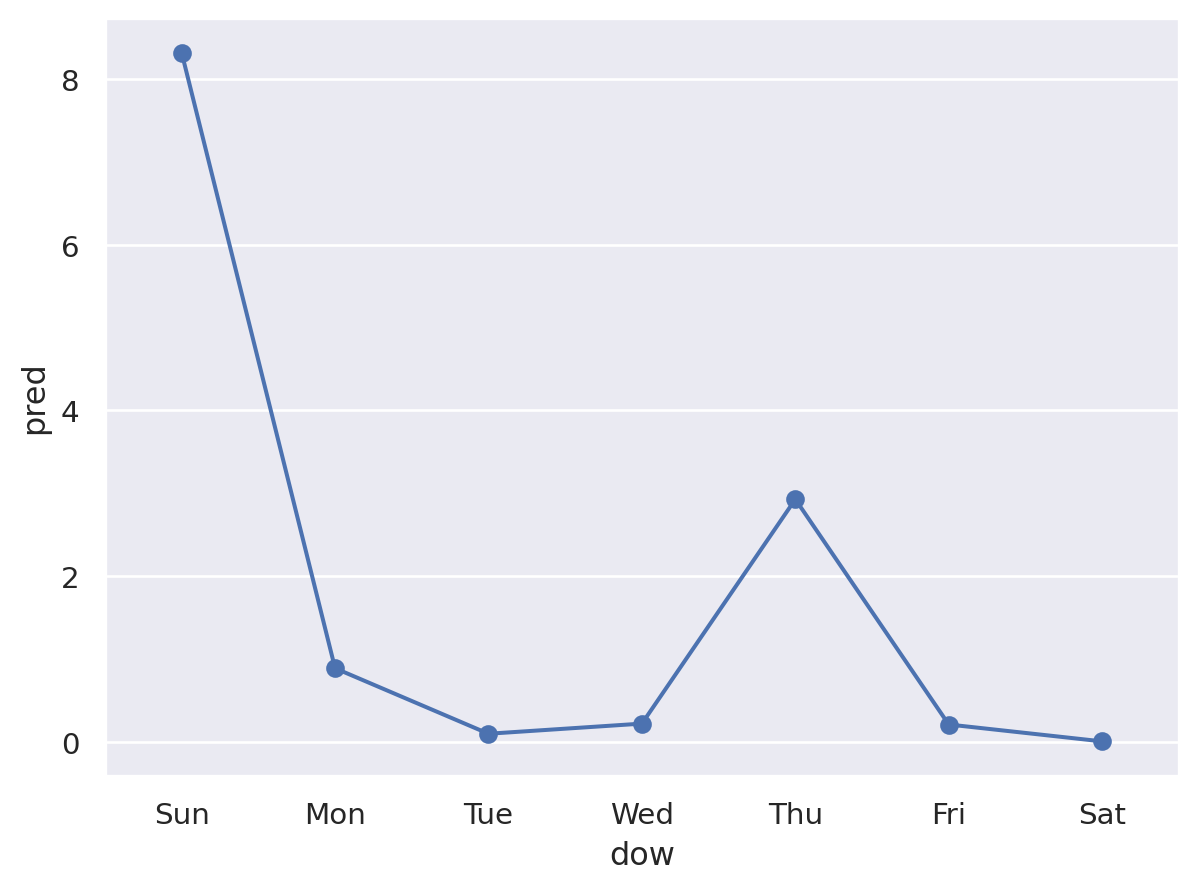

In [ ]:
(
    so.Plot(grid, x='dow', y='pred')
    .add(so.Line(marker="o"))
)

In [ ]:
2**mod_full.params[1:5]

season[T.summer]    2.397349e+07
dow[T.Mon]          1.065836e-01
dow[T.Tue]          1.153361e-02
dow[T.Wed]          2.623297e-02
dtype: float64

In [ ]:
sfo["lresid_full"] = mod_full.resid
sfo

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,dow,season,lresid_full
13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,...,EWR,SFO,361.0,2565,6,0,2013-01-01 06:00:00,Tue,other month,4.159548
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,...,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00,Tue,other month,30.958542
55,2013,1,1,655.0,700,-5.0,1037.0,1045,-8.0,DL,...,JFK,SFO,362.0,2586,7,0,2013-01-01 07:00:00,Tue,other month,7.018937
82,2013,1,1,729.0,730,-1.0,1049.0,1115,-26.0,VX,...,JFK,SFO,356.0,2586,7,30,2013-01-01 07:00:00,Tue,other month,-11.562945
87,2013,1,1,734.0,737,-3.0,1047.0,1113,-26.0,B6,...,JFK,SFO,350.0,2586,7,37,2013-01-01 07:00:00,Tue,other month,-11.698717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336658,2013,9,30,1938.0,1850,48.0,2248.0,2220,28.0,VX,...,JFK,SFO,323.0,2586,18,50,2013-09-30 18:00:00,Mon,other month,17.505405
336662,2013,9,30,1940.0,1900,40.0,2228.0,2232,-4.0,DL,...,JFK,SFO,323.0,2586,19,0,2013-09-30 19:00:00,Mon,other month,-15.464398
336679,2013,9,30,2001.0,2000,1.0,2302.0,2328,-26.0,UA,...,EWR,SFO,323.0,2565,20,0,2013-09-30 20:00:00,Mon,other month,-38.202998
336701,2013,9,30,2023.0,2025,-2.0,2315.0,2350,-35.0,B6,...,JFK,SFO,327.0,2586,20,25,2013-09-30 20:00:00,Mon,other month,-48.888905


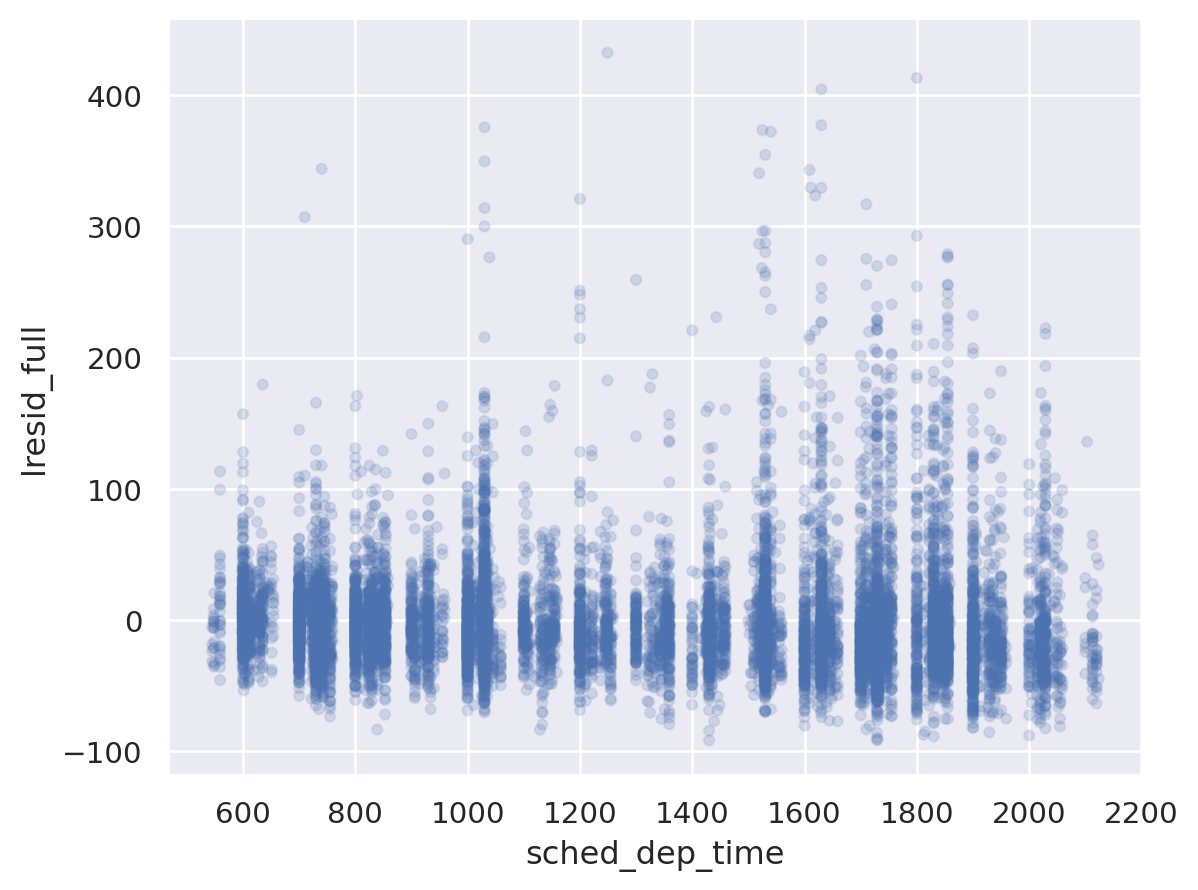

In [ ]:
(
    so.Plot(sfo, x='sched_dep_time', y='lresid_full')
    .add(so.Dots(alpha=.1))
)

모델을 하나하나 추가해서 살펴보았다.

In [ ]:
sfo_mod1 = ols("arr_delay ~ hour + origin", data=sfo).fit()
sfo_mod2 = ols("arr_delay ~ hour + season+origin", data=sfo).fit()
sfo_mod3 = ols("arr_delay ~ hour + origin+season+carrier", data=sfo).fit()
sfo_mod4 = ols("arr_delay ~ hour + dow+origin+season+carrier", data=sfo).fit()
sfo_mod5 = ols("arr_delay ~ hour + dow+origin+season+carrier+air_time", data=sfo).fit()
sfo_mod6 = ols("arr_delay ~ hour + dow+origin+season+carrier+air_time+sched_arr_time+sched_dep_time", data=sfo).fit()



모델에 변수를 하나씩 추가해서 서로다른 모델을 만든 후에 잔차분석을 실시 

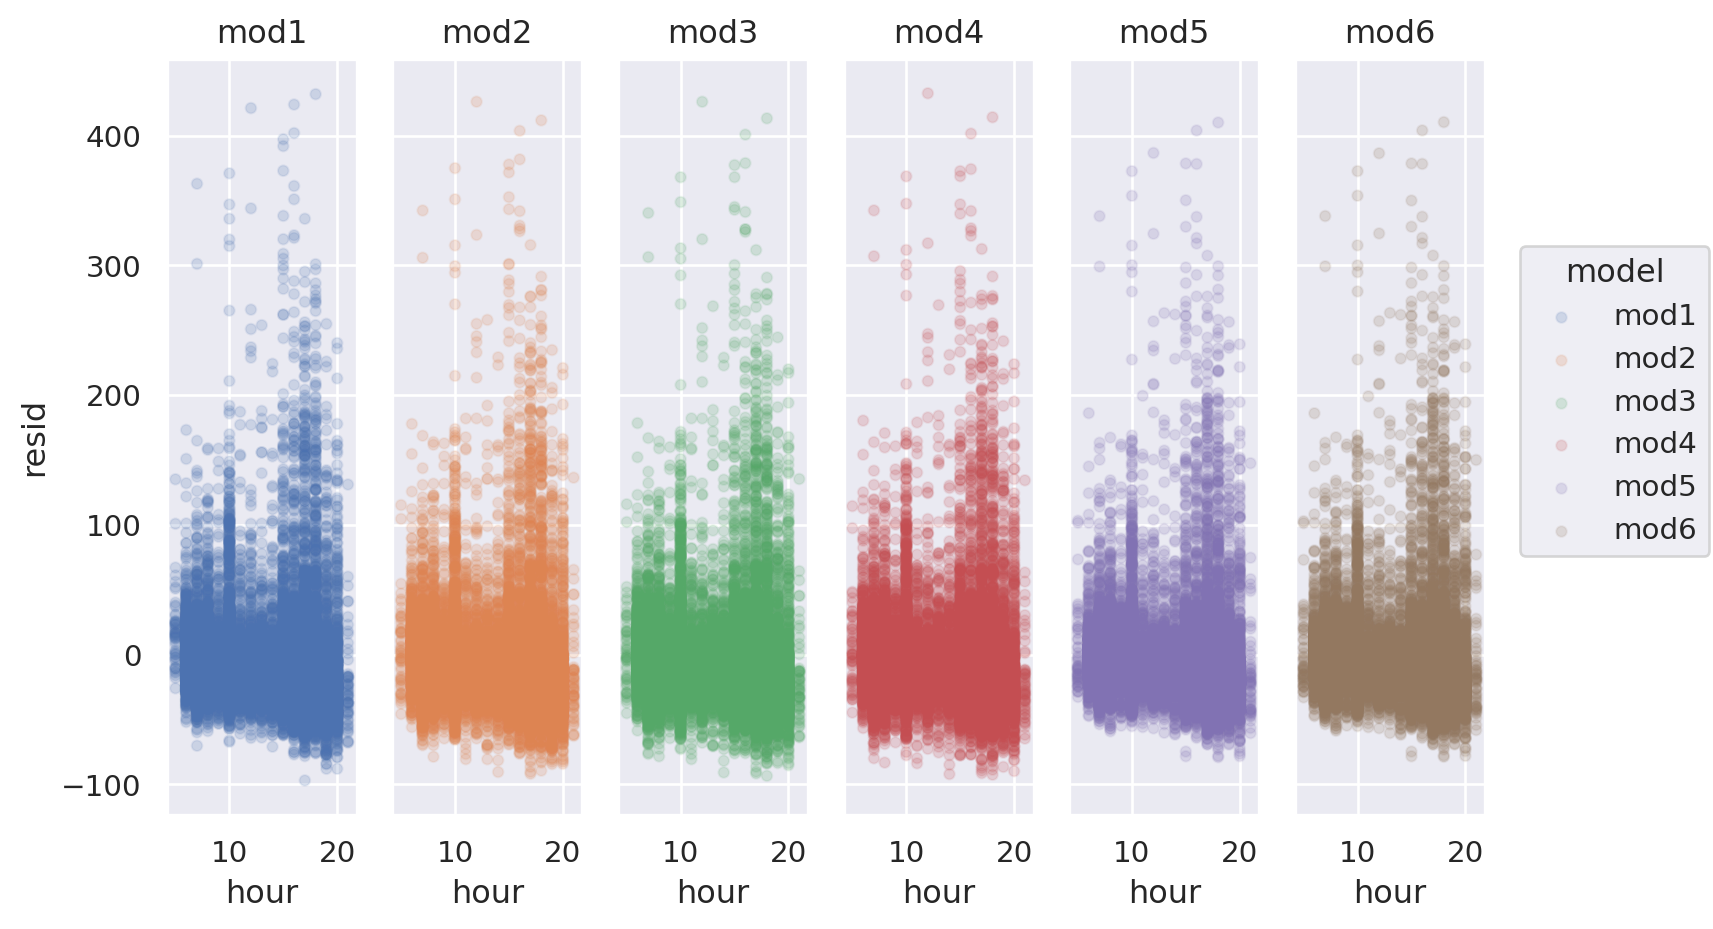

In [ ]:
sfo_mods = sfo.assign(
    mod1=sfo_mod1.resid,
    mod2=sfo_mod2.resid,
    mod3=sfo_mod3.resid,
    mod4=sfo_mod4.resid,
    mod5=sfo_mod5.resid,
    mod6=sfo_mod6.resid,

)

sfo_mods = sfo_mods.melt(
    id_vars=["arr_delay", "hour"],
    value_vars=["mod1", "mod2", "mod3","mod4","mod5","mod6"],
    var_name="model",
    value_name="resid",
)

(
    so.Plot(sfo_mods, x='hour', y='resid', color='model')
    .add(so.Dots(alpha=.1))
    .facet("model")
    .layout(size=(8, 5))
)

feature을 하나씩 추가해줘도 nice한 변화를 찾긴 어려웠음.

수업자료에서 제시한 diamond의 feature들만큼 뚜렷한 상관관계와 인과관계를 가진 feature들은 없었다고 판단함

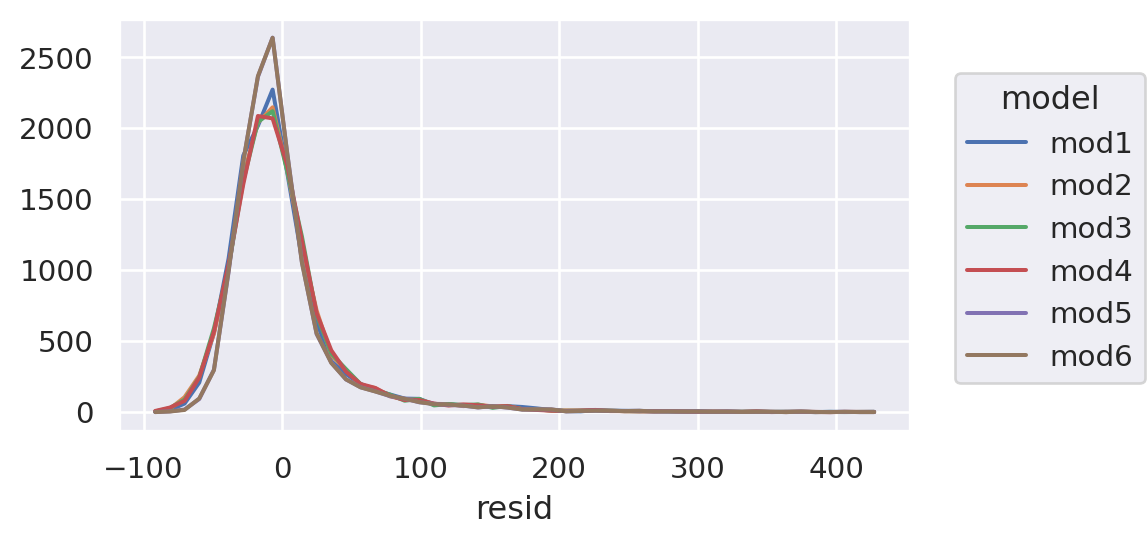

In [ ]:
(
    so.Plot(sfo_mods, x='resid', color='model')
    .add(so.Line(), so.Hist(bins=50))
    .layout(size=(5, 3))
)

feature을 추가한 모델일 수록 resid가 0에 더 수렴하는 식으로 그래프를 설명할 수 있음.

In [ ]:
from statsmodels.tools.eval_measures import rmse, meanabs

mods = [sfo_mod1, sfo_mod2, sfo_mod3,sfo_mod4,sfo_mod5,sfo_mod6]
y = sfo.arr_delay
print("The prediction accuracy of the models (original unit except R-squared):\n")

for mod in mods:
    y_hat = 2**mod.fittedvalues
    R2 = mod.rsquared

    print(
        f"R-squared: {R2:.2f}, RMSE: {rmse(y, y_hat):.2f}, "
        f"MAE:{meanabs(y, y_hat):.2f}"
    )

The prediction accuracy of the models (original unit except R-squared):

R-squared: 0.04, RMSE: 41487.65, MAE:9709.11
R-squared: 0.08, RMSE: 11978437802.10, MAE:1416495218.54
R-squared: 0.09, RMSE: 88043455309.75, MAE:6894666524.77
R-squared: 0.10, RMSE: 914020089536.50, MAE:36067916228.96
R-squared: 0.20, RMSE: 10371398554246061263337022056294715577981730816.00, MAE:90377625088507772685686030404624984771133440.00
R-squared: 0.20, RMSE: 11330888903718873971158920366778519176834187264.00, MAE:98738740383338806381586800222021890846228480.00


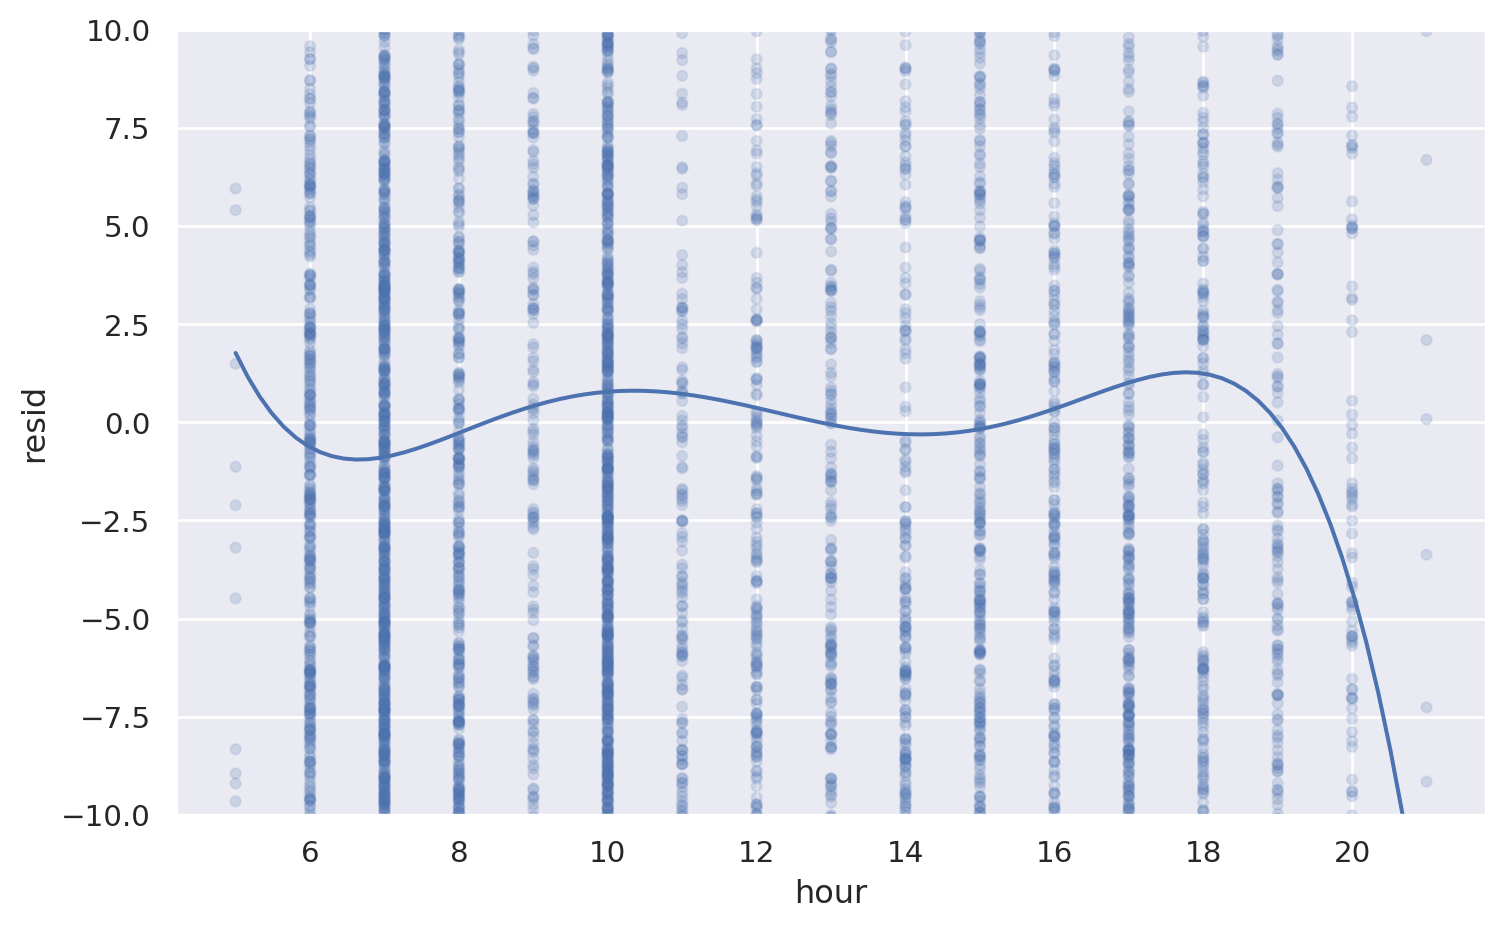

In [ ]:
sfo_mods = sfo.assign(
    mod5=sfo_mod5.resid,

)

sfo_mods = sfo_mods.melt(
    id_vars=["arr_delay", "hour"],
    value_vars=["mod5"],
    var_name="model",
    value_name="resid",
)

(
    so.Plot(sfo_mods, x='hour', y='resid')
    .add(so.Dots(alpha=.1))
    .layout(size=(8, 5))
    .add(so.Line(), so.PolyFit(5))
    .limit(y=(-10,10))
)

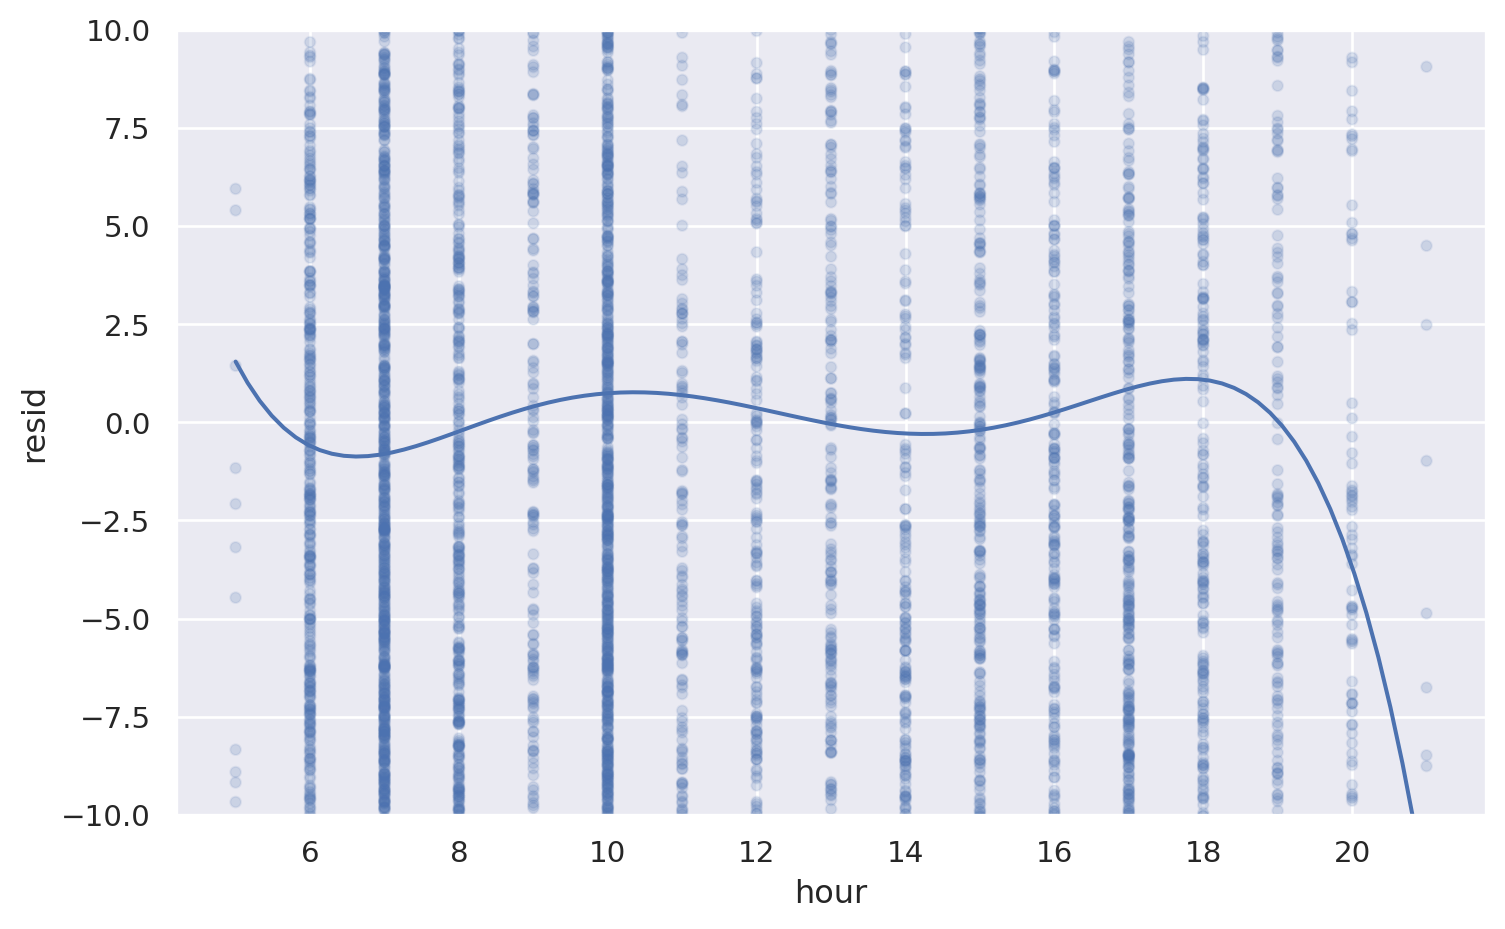

In [ ]:
sfo_mods = sfo.assign(
    mod6=sfo_mod6.resid,

)

sfo_mods = sfo_mods.melt(
    id_vars=["arr_delay", "hour"],
    value_vars=["mod6"],
    var_name="model",
    value_name="resid",
)

(
    so.Plot(sfo_mods, x='hour', y='resid')
    .add(so.Dots(alpha=.1))
    .layout(size=(8, 5))
    .add(so.Line(), so.PolyFit(5))
    .limit(y=(-10,10))
)

# CONCULSION

모델을 1번부터 6번까지 만들어보고 중요하다고 생각되는 변수들을 하나씩 추가하면서 잔차분석을 수행하였음.
모델을 추가할 수록 r-sqaure값이 증가하는 (모델을 더 잘 설명하는 변수들을 설정) 것을 알 수 있었고 주어진 모델에서 air_time을 추가하였다.

Linear model: arr_delay ~ hour + origin + carrier + season + dow
에서 airtime을 추가해주었음.

저자는 왜 아래와 같은 모형을 세웠을까?


A: 6,7월에 항공평 도착지연이 더 잦음으로 둘을 합쳐서 묶고 모델을 생성한듯 하다. 

A: arr_delay와 관계가 있어보이는 변수들과의 관계를 파악하고자 함, 

hour,origin,carrier,season,dow와 arr_delay의 사이의 어떤 관계가 나오는지 잘 설명하고자 하는지 관계를 세움 season이라는 변수를 통해 [summer, other month] 로 나눔. 

arr_delay가 500을 넘어가는 것은 이상치로 판단하고 관계분석에서 제외함


arr_delay에 영향을 줄만한 요인은 출발시간, 도착지, 항공사, 요일, 계절 등등이 있다는 것을 분석을 통해 확인함

다음은 좋은 모형인가?





A: air_time의 변수를 추가해줬을 때 , 변수가 하나씩 추가될때 모델의 성능이 좋아지는 것을 보아 적절한 변수를 셀렉하여 분석을 진행하였을 때 더 좋은 모델을 도출할 수 있을 것이라고 생각됌

지금 당장은 모델의 설명력이 부족하다고 판단됨